In [1]:
import matplotlib.pyplot as plt
%matplotlib inline  
%load_ext autoreload
%autoreload 2
import numpy as np
import time
import random
def print_np(x):
    print ("Type is %s" % (type(x)))
    print ("Shape is %s" % (x.shape,))
#     print ("Values are: \n%s" % (x))

In [2]:
import sys
# sys.path.append('../')
sys.path.append('../')
sys.path.append('../model')
sys.path.append('../cost')
sys.path.append('../constraints')
import UnicycleModel
import UnicycleCost
import UnicycleConstraints
from scipy.integrate import solve_ivp
from PTR import PTR

In [3]:
ix = 3
iu = 2
ih = 2
N = 30
tf = 3
delT = tf/N
max_iter = 20

In [4]:
xi = np.zeros(3)
xi[0] = -2.0
xi[1] = -2.0 
xi[2] = 0

xf = np.zeros(3)
xf[0] = 2.0
xf[1] = 2.0
xf[2] = 0

myModel = UnicycleModel.unicycle('Hello',ix,iu,'numeric_central')
myCost = UnicycleCost.unicycle('Hello',ix,iu,N)
myConst = UnicycleConstraints.UnicycleConstraints('Hello',ix,iu)

x0 = np.zeros((N+1,ix))
for i in range(N+1) :
    x0[i] = (N-i)/N * xi + i/N * xf
# u0 = np.random.rand(N,iu)
u0 = np.zeros((N+1,iu))

In [5]:
i1 = PTR('unicycle',N,tf,max_iter,myModel,myCost,myConst,type_discretization="foh",
          w_c=1,w_vc=1e3,w_tr=1e-1,w_rate=0,
         tol_vc=1e-6,tol_tr=1e-3)
x,u,xbar,ubar,total_num_iter,flag_boundary,l,l_vc,l_tr,x_traj,u_traj,T_traj = i1.run(x0,u0,xi,xf)


Set parameter Username
Academic license - for non-commercial use only - expires 2023-04-06
iteration   total_cost        cost        ||vc||     ||tr||       reduction   w_tr        bounary
1           4059.661          54.237      4           54.2        -3.06e+03   0.100       0(0.133)
2           102.640           95.011      2.13e-13    76.3        3.96e+03    0.100       0(0.142)
3           123.899           120.508     4.16e-11    33.9        -21.3       0.100       0(0.0908)
4           133.236           132.545     4.63e-12    6.91        -9.34       0.100       0(0.0238)
5           141.347           141.263     2.97e-14    0.844       -8.11       0.100       0(0.00322)
6           141.764           141.751     9.13e-14    0.13        -0.417      0.100       1(0.000708)
7           141.913           141.909     2.1e-13     0.0368      -0.149      0.100       1(0.000193)
8           141.952           141.951     1.14e-12    0.0104      -0.039      0.100       1(5.8e-05)
9      

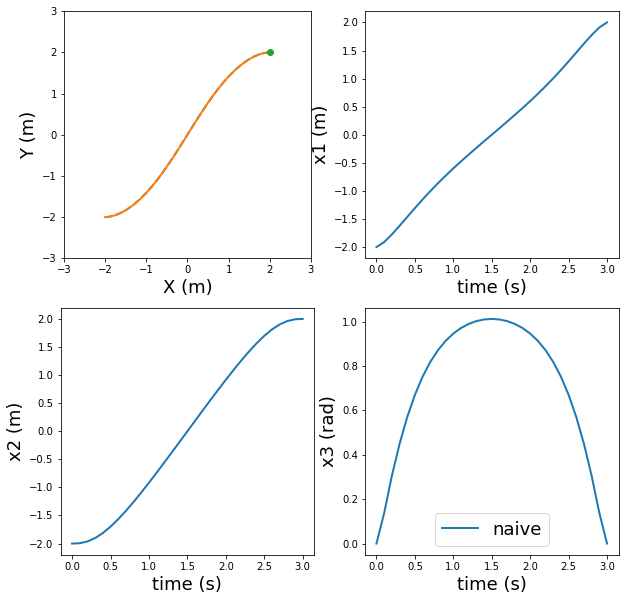

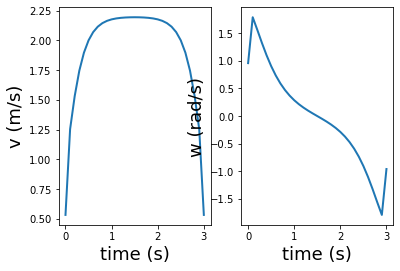

In [6]:
plt.figure(figsize=(10,10))
fS = 18
plt.subplot(221)
plt.plot(x[:,0], x[:,1],'--', linewidth=2.0)
plt.plot(xbar[:,0], xbar[:,1],'-', linewidth=2.0)
plt.plot(xf[0],xf[1],"o",label='goal')
plt.gca().set_aspect('equal', adjustable='box')
plt.axis([-3, 3, -3, 3])
plt.xlabel('X (m)', fontsize = fS)
plt.ylabel('Y (m)', fontsize = fS)
plt.subplot(222)
plt.plot(np.array(range(N+1))*0.1, x[:,0], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x1 (m)', fontsize = fS)
plt.subplot(223)
plt.plot(np.array(range(N+1))*0.1, x[:,1], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x2 (m)', fontsize = fS)
plt.subplot(224)
plt.plot(np.array(range(N+1))*0.1, x[:,2], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x3 (rad)', fontsize = fS)
plt.legend(fontsize=fS)
plt.show()

plt.figure()
plt.subplot(121)
plt.plot(np.array(range(N+1))*0.1, u[:,0], linewidth=2.0)
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('v (m/s)', fontsize = fS)
plt.subplot(122)
plt.plot(np.array(range(N+1))*0.1, u[:,1], linewidth=2.0)
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('w (rad/s)', fontsize = fS)
plt.show()

In [ ]:
# from matplotlib.patches import Rectangle
# import imageio
# import os

In [ ]:
# filenames = []
# for i in range(N+1) :
#     fS = 18
#     fig = plt.figure(figsize=(10,10))
#     ax = fig.add_subplot(111)
#     plt.gca().set_aspect('equal', adjustable='box')
#     plt.plot(x[:i+1,0], x[:i+1,1], linewidth=2.0) 
#     plt.plot(xf[0], xf[1],'*', linewidth=2.0)
#     plt.plot(x[i,0], x[i,1],'*', linewidth=2.0) 
#     plt.plot(x[i,0], x[i,1], marker=(3, 0, x[i,2]*180/np.pi-90), markersize=20, linestyle='None')
# #     ax.add_patch(rec)
#     plt.axis([-3, 3, -3, 3])
#     plt.xlabel('X (m)', fontsize = fS)
#     plt.ylabel('Y (m)', fontsize = fS)

#     filename = '../images/{:d}.png'.format(i)
#     plt.savefig(filename)
#     filenames.append(filename)
#     plt.close()

In [ ]:
# with imageio.get_writer('../images/unicycle.gif', mode='I') as writer:
#     for filename in filenames:
#         image = imageio.imread(filename)
#         writer.append_data(image)
# for filename in set(filenames):
#     os.remove(filename)